In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [12]:
# General settings
import matplotlib as mpl
mpl.rc_file('/Users/ulyanadupletsa/Documents/PhDThesisPlots/matplotlibrc')

mpl.rc('xtick', labelsize = 25) 
mpl.rc('ytick', labelsize = 25)

In [13]:
my_color_darker = '#2f4f4f'
my_color2_darker = '#f6b26b'
my_color = '#97a7a7'

In [14]:
PATH_TO_DATA = '/Users/ulyanadupletsa/Documents/KN/results_10years/'

In [28]:
detector_ntw = 'ET_delta_10_cryo'
lbs_signals = ['mass_1', 'mass_2', 'luminosity_distance', 'dec', 'ra', 'theta_jn',
	   'psi', 'geocent_time', 'phase', 'redshift', 'lambda_1', 'lambda_2', 'network_SNR']
alpha = 1.0
myfontsize=25

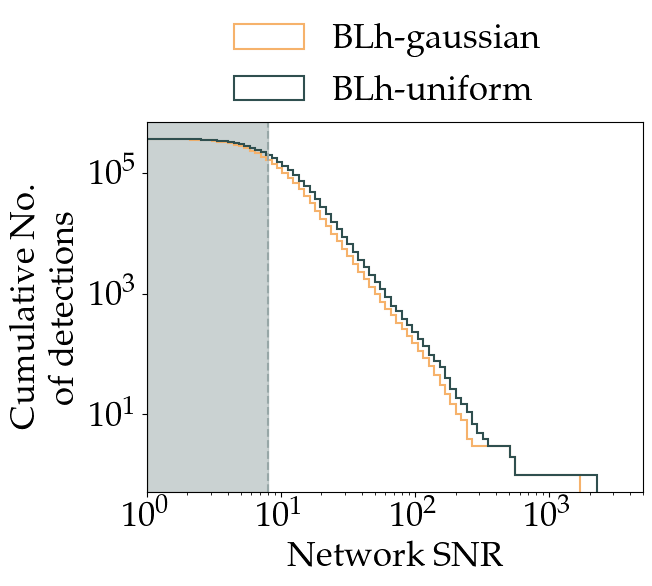

In [39]:
# plot cumulative histograms of SNR for ET-Delta

my_linewidth = 1.5

injections_BLh_gaussian = pd.read_csv('%s/%s/BLh_gaussian/%s/Signals_%s_BLh_gaussian_%s.txt' %(str(PATH_TO_DATA), str(alpha), 
					str(detector_ntw), str(alpha), str(detector_ntw)),
						names = lbs_signals, skiprows = 1, delimiter = ' ')
injections_APR4_gaussian = pd.read_csv('%s/%s/APR4_gaussian/%s/Signals_%s_APR4_gaussian_%s.txt' %(str(PATH_TO_DATA), str(alpha), 
					str(detector_ntw), str(alpha), str(detector_ntw)),
						names = lbs_signals, skiprows = 1, delimiter = ' ')

injections_BLh_uniform = pd.read_csv('%s/%s/BLh_uniform/%s/Signals_%s_BLh_uniform_%s.txt' %(str(PATH_TO_DATA), str(alpha), 
					str(detector_ntw), str(alpha), str(detector_ntw)),
						names = lbs_signals, skiprows = 1, delimiter = ' ')
injections_APR4_uniform = pd.read_csv('%s/%s/APR4_uniform/%s/Signals_%s_APR4_uniform_%s.txt' %(str(PATH_TO_DATA), str(alpha), 
					str(detector_ntw), str(alpha), str(detector_ntw)),
						names = lbs_signals, skiprows = 1, delimiter = ' ')
fig, ax = plt.subplots(1)
#plt.hist(injections_APR4_gaussian['network_SNR'], bins=np.logspace(0, 4, 100), cumulative = -1, histtype='step', linestyle='solid', linewidth=1.5, color=my_color_darker, label='APR4-gaussian')
#plt.hist(injections_APR4_uniform['network_SNR'], bins=np.logspace(0, 4, 100), cumulative = -1, histtype='step', linestyle='dashed', linewidth=1.5, color=my_color_darker, label='APR4-uniform')
plt.hist(injections_BLh_gaussian['network_SNR'], bins=np.logspace(0, 4, 100), cumulative = -1, histtype='step', linestyle='solid', linewidth=1.5, color=my_color2_darker, label='BLh-gaussian')
plt.hist(injections_BLh_uniform['network_SNR'], bins=np.logspace(0, 4, 100), cumulative = -1, histtype='step', linestyle='solid', linewidth=1.5, color=my_color_darker, label='BLh-uniform')
fig.legend(ncol=1, frameon=False, fontsize=myfontsize, loc='upper center', bbox_to_anchor=(0.5,1.15))
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Cumulative No. \n of detections', fontsize=myfontsize)
plt.xlabel('Network SNR', fontsize=myfontsize)

snr_thr = 8.
plt.axvspan(1, snr_thr, alpha=0.5, color=my_color)
plt.axvline(x=snr_thr, linestyle='dashed', color=my_color)
plt.xlim(1, 5*10**3)
plt.savefig('plots/kn_snr_alpha%s_etdelta.pdf' %alpha, bbox_inches='tight')
plt.show()